Image loaded successfully!


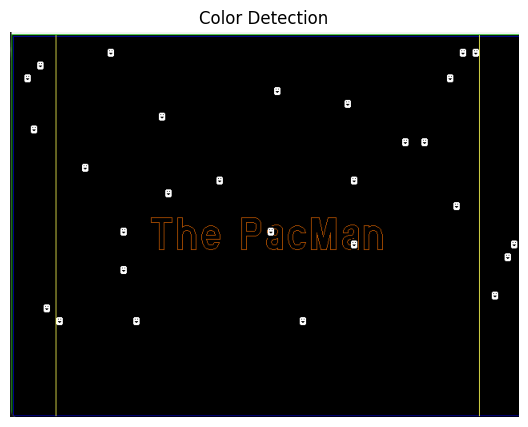

In [16]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

# Define color ranges in HSV
color_ranges = {
    "Red": [(0, 120, 70), (10, 255, 255)],
    "Green": [(40, 40, 40), (80, 255, 255)],
    "Blue": [(90, 50, 50), (130, 255, 255)],
    "Yellow": [(20, 100, 100), (30, 255, 255)]
}

# Function to detect and track colors
def detect_color(image):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    output = image.copy()
    
    for color, (lower, upper) in color_ranges.items():
        lower = np.array(lower, dtype="uint8")
        upper = np.array(upper, dtype="uint8")
        
        mask = cv2.inRange(hsv, lower, upper)
        contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
        for contour in contours:
            if cv2.contourArea(contour) > 500:
                x, y, w, h = cv2.boundingRect(contour)
                cv2.rectangle(output, (x, y), (x+w, y+h), (0, 255, 0), 2)
                cv2.putText(output, color, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
    
    return output

# File path
image_path = "C:/Users/HP/OneDrive/Pictures/Saved Pictures/pac4.png"

# Debugging: Check if file exists
if not os.path.isfile(image_path):
    print(f"Error: The file at {image_path} does not exist.")
else:
    # Load the image
    image = cv2.imread(image_path)
    
    # Debugging: Check if image is loaded
    if image is None:
        print(f"Error: Failed to load image from {image_path}.")
    else:
        print("Image loaded successfully!")
        result = detect_color(image)
        
        # Display results
        plt.figure(figsize=(10, 5))
        plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
        plt.axis("off")
        plt.title("Color Detection")
        plt.show()
